In [1]:
import re

def html_to_text(data):       
    # remove the newlines
    data = data.replace("\n", " ")
    data = data.replace("\r", " ")
  
    # replace consecutive spaces into a single one
    data = " ".join(data.split())  
  
    # get only the body content
    bodyPat = re.compile(r'<body[^<>]*?>(.*?)</body>', re.I)
    result = re.findall(bodyPat, data)
    data = result[0]
  
    # now remove the java script
    p = re.compile(r'<script[^<>]*?>.*?</script>')
    data = p.sub('', data)
  
    # remove the css styles
    p = re.compile(r'<style[^<>]*?>.*?</style>')
    data = p.sub('', data)
  
    # remove html comments
    p = re.compile(r'')
    data = p.sub('', data)
  
    # remove all the tags
    p = re.compile(r'<[^<]*?>')
    data = p.sub('', data)
  
    return data

In [2]:
import os

input_directory = 'data/html/'

for root, _, files in os.walk(input_directory):
     for input_filename in files:  
            
        if input_filename.endswith(".html"):  
            
            input_filepath = os.path.join(root, input_filename)
            
            output_directory =  root.replace('/html/', '/txt/')
            
            if not os.path.exists(output_directory):
                os.makedirs(output_directory)
            
            output_filename = os.path.basename(input_filename).replace('.html', '.txt')            
            output_filepath = os.path.join(output_directory, output_filename)
            
            if not os.path.exists(output_filepath):
                
                with open(input_filepath, 'r') as html_file:
                    html = html_file.read()    

                text = html_to_text(html)
                
                with open(output_filepath, 'w') as txt_file:
                    txt_file.write(text)      
                    print(output_filepath)

In [3]:
import os

input_directory = 'data/txt/'

for root, _, files in os.walk(input_directory):
    
    output_directory = root.replace('/txt/', '/txt-combined/')
    
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    output_filename = os.path.basename(root) + '.txt'
    output_filepath = os.path.join(output_directory, output_filename)
    
    if not os.path.exists(output_filepath):    
    
        text = ''
        for input_filename in files:
            if input_filename.endswith(".txt"):              
                input_filepath = os.path.join(root, input_filename)

                with open(input_filepath, 'r') as txt_file:
                    text += ' ' + txt_file.read()        

        with open(output_filepath, 'w') as txt_file:
            txt_file.write(text)
            print(output_filepath)                

In [42]:
import os
from sklearn.datasets import load_files

dataset = load_files(container_path = 'data/txt-combined/',shuffle=False)

names = []
for filename in dataset.filenames:
    names.append(os.path.basename(filename))  
    
print(names)
print(dataset.target_names)
print(len(dataset.data[0]))

['gap_-C0BAAAAQAAJ.txt', 'gap_2X5KAAAAYAAJ.txt', 'gap_9ksIAAAAQAAJ.txt', 'gap_Bdw_AAAAYAAJ.txt', 'gap_CSEUAAAAYAAJ.txt', 'gap_CnnUAAAAMAAJ.txt', 'gap_DhULAAAAYAAJ.txt', 'gap_DqQNAAAAYAAJ.txt', 'gap_GIt0HMhqjRgC.txt', 'gap_IlUMAQAAMAAJ.txt', 'gap_MEoWAAAAYAAJ.txt', 'gap_RqMNAAAAYAAJ.txt', 'gap_TgpMAAAAYAAJ.txt', 'gap_VPENAAAAQAAJ.txt', 'gap_WORMAAAAYAAJ.txt', 'gap_XmqHlMECi6kC.txt', 'gap_aLcWAAAAQAAJ.txt', 'gap_dIkBAAAAQAAJ.txt', 'gap_fnAMAAAAYAAJ.txt', 'gap_m_6B1DkImIoC.txt', 'gap_ogsNAAAAIAAJ.txt', 'gap_pX5KAAAAYAAJ.txt', 'gap_udEIAAAAQAAJ.txt', 'gap_y-AvAAAAYAAJ.txt']
['gap_-C0BAAAAQAAJ', 'gap_2X5KAAAAYAAJ', 'gap_9ksIAAAAQAAJ', 'gap_Bdw_AAAAYAAJ', 'gap_CSEUAAAAYAAJ', 'gap_CnnUAAAAMAAJ', 'gap_DhULAAAAYAAJ', 'gap_DqQNAAAAYAAJ', 'gap_GIt0HMhqjRgC', 'gap_IlUMAQAAMAAJ', 'gap_MEoWAAAAYAAJ', 'gap_RqMNAAAAYAAJ', 'gap_TgpMAAAAYAAJ', 'gap_VPENAAAAQAAJ', 'gap_WORMAAAAYAAJ', 'gap_XmqHlMECi6kC', 'gap_aLcWAAAAQAAJ', 'gap_dIkBAAAAQAAJ', 'gap_fnAMAAAAYAAJ', 'gap_m_6B1DkImIoC', 'gap_ogsNAAAAIAAJ', 'g

In [43]:
d = {'gap_-C0BAAAAQAAJ': 'Greek and roman geography',
    'gap_2X5KAAAAYAAJ': 'Tacitus: roman 3',
    'gap_9ksIAAAAQAAJ': 'Peloponnesian war: greek 1',
    'gap_Bdw_AAAAYAAJ': 'The history of Rome 1',
    'gap_CSEUAAAAYAAJ': 'Roman Empire 3', 
    'gap_CnnUAAAAMAAJ': 'Josephus: jewish 1', 
    'gap_DhULAAAAYAAJ': 'The history of Rome 2',
    'gap_DqQNAAAAYAAJ': 'The history of Rome 3',
    'gap_GIt0HMhqjRgC': 'Roman Empire 6', 
     'gap_IlUMAQAAMAAJ': 'Roman Empire 2',
     'gap_MEoWAAAAYAAJ': 'Tacitus: roman 2', 
     'gap_RqMNAAAAYAAJ': 'The history of Rome 5', 
     'gap_TgpMAAAAYAAJ': 'Josephus: jewish 3',
     'gap_VPENAAAAQAAJ': 'Roman Empire 5', 
     'gap_WORMAAAAYAAJ': 'Tacitus: roman 4', 
     'gap_XmqHlMECi6kC': 'Roman Empire 6', 
     'gap_aLcWAAAAQAAJ': 'Roman Empire 1', 
     'gap_dIkBAAAAQAAJ': 'The history of Rome 3', 
     'gap_fnAMAAAAYAAJ': 'Peloponnesian war: greek 1', 
     'gap_m_6B1DkImIoC': 'Roman History, Gordon', 
     'gap_ogsNAAAAIAAJ': 'Josephus: jewish 4', 
     'gap_pX5KAAAAYAAJ': 'Tacitus: roman 1', 
     'gap_udEIAAAAQAAJ': 'History: old roman', 
     'gap_y-AvAAAAYAAJ': 'Josephus: jewish 3'}
for i in range(len(dataset.target_names)):
    names[i] = d[dataset.target_names[i]]
print(names)

['Greek and roman geography', 'Tacitus: roman 3', 'Peloponnesian war: greek 1', 'The history of Rome 1', 'Roman Empire 3', 'Josephus: jewish 1', 'The history of Rome 2', 'The history of Rome 3', 'Roman Empire 6', 'Roman Empire 2', 'Tacitus: roman 2', 'The history of Rome 5', 'Josephus: jewish 3', 'Roman Empire 5', 'Tacitus: roman 4', 'Roman Empire 6', 'Roman Empire 1', 'The history of Rome 3', 'Peloponnesian war: greek 1', 'Roman History, Gordon', 'Josephus: jewish 4', 'Tacitus: roman 1', 'History: old roman', 'Josephus: jewish 3']


In [ ]:
import numpy as np

stop_words = ["english"]#"english"
# stop_words = [
#     'AND', 'About', 'After', 'All', 'And', 'But', 'Both', 'Butthe', 'Every', 'For', 
#     'From', 'His', 'Besides', 'How', 'Nor', 'Not', 'One', 'Perhaps', 'She', 'Since', 
#     'Some', 'Such', 'THE', 'That', 'The', 'Their', 'There', 'These', 'They', 'This', 
#     'Those', 'Two', 'Was', 'What', 'When', 'While', 'With', 'Yet', 'You', 'Another', 
#     'Let', 'Many', 'Where', 'See', 'Under', 'Inthe', 'New', 'Nothing', 'Our', 'Thus', 
#     'Were', 'Whether', 'Who', 'Without', 'War', 'Why', 'Your', 'Now', 'Other', 'Others', 
#     'Are', 'Each', 'Had', 'Have', 'Her', 'Then', 'During', 'Before', 'Against', 'Among', 
#     'Even', 'BOOK', 'Between', 'Having', 'Hence', 'Here', 'Instead', 'Theywere', 'Though', 
#     'However', 'Three','Above', 'According', 'Four', 'HISTORY', 'Ihave', 'Ill', 'Itis', 
#     'Its', 'Itwas', 'Six', 'Which', 'Within', 'Ihave', 'Upon', 'Upper', 'More', 'Most', 
#     'Several', 'VOL', 'WITH', 'Neither', 'Onthe', 'Five', 'Atthe', 'CONTENTS', 'Did', 'Like', 
#     'Ten', 'Various', 'Whatever', 'Whenthe', 'Will', 'Would', 'Could', 'Although', 'Because', 
#     'Being', 'END', 'Forthe', 'Fromthe', 'Has', 'Hethen', 'Hewas', 'Hehad', 'Ofthe', 'Next',
#     'Shall', 'Should', 'Soon', 'Thiswas', 'Seven', 'VOLUME', 'Thiswas', 'Through', 'Till', 'Vol'
# ]

# Let's create Bag of Words filtered by document frequency
# Parameters:
min_df = 0.15 # to ignore terms that have a document frequency strictly lower than the given threshold.
max_df = 0.75 # to ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
# a reular expression for parsing of words
#token_pattern = r'[\s\.\,]([A-Z](?:[A-Za-z]{2,}))[\s\.\,]' 
token_pattern_ = r'([a-zA-Z]{3,})'

from sklearn.feature_extraction.text import CountVectorizer

# Term Frequency ( TF )
#vectorizer = CountVectorizer( min_df = min_df, max_df = max_df, token_pattern = token_pattern )
# or the same:
#vectorizer = TfidfVectorizer( min_df = min_df, max_df = max_df, token_pattern = token_pattern, use_idf=False, norm = None )

from sklearn.feature_extraction.text import TfidfVectorizer

# TF — Term Frequency, IDF — Inverse Document Frequency ( TF-IDF )
vectorizer = TfidfVectorizer( min_df = min_df, max_df = max_df, token_pattern = token_pattern_, use_idf = True, norm = 'l2', stop_words=stop_words, lowercase = True )

# a sparse Matrix of Document Term Frequencies
dtm = vectorizer.fit_transform(dataset.data)

vocab = vectorizer.get_feature_names()  
# a list

print('Amount of words: ')
print(len(vocab))

print('Selected words: ')
print(vocab)

print('Sparse matrix: ')
print(dtm)

In [6]:
dtm = dtm.toarray()  # convert to a regular array

vocab = np.array(vocab)

In [37]:
# Compute Matrix of Distances

from sklearn.metrics.pairwise import pairwise_distances

#‘cityblock’ - metrics.pairwise.manhattan_distances
#‘cosine’    - metrics.pairwise.cosine_distances
#‘euclidean’ - metrics.pairwise.euclidean_distances
#‘l1’        - metrics.pairwise.manhattan_distances
#‘l2’        - metrics.pairwise.euclidean_distances
#‘manhattan’ - metrics.pairwise.manhattan_distances



#metric = 'euclidean'  # Euclidean distances ( dissimilarity )
#metric = 'manhattan'  # Manhattan distances ( dissimilarity )
metric = 'cosine'     # Cosine similarity (*)

#dist = pairwise_distances(dtm, metric = metric) # matrix of distances for euclidean or manhattan metrics
dist = 1 - pairwise_distances(dtm, metric = metric) # matrix of distances for a cosine metric (*) 

np.round(dist, 2)

array([[ 1.  ,  0.06,  0.06,  0.05,  0.16,  0.13,  0.13,  0.09,  0.12,
         0.12,  0.08,  0.09,  0.12,  0.13,  0.13,  0.13,  0.19,  0.16,
         0.11,  0.08,  0.11,  0.11,  0.12,  0.13],
       [ 0.06,  1.  ,  0.02,  0.04,  0.08,  0.03,  0.02,  0.05,  0.06,
         0.11,  0.23,  0.06,  0.03,  0.08,  0.28,  0.07,  0.13,  0.06,
         0.03,  0.06,  0.1 ,  0.35,  0.06,  0.04],
       [ 0.06,  0.02,  1.  ,  0.03,  0.02,  0.02,  0.24,  0.03,  0.03,
         0.03,  0.03,  0.07,  0.03,  0.02,  0.01,  0.02,  0.03,  0.03,
         0.53,  0.04,  0.04,  0.02,  0.01,  0.03],
       [ 0.05,  0.04,  0.03,  1.  ,  0.04,  0.03,  0.08,  0.27,  0.04,
         0.04,  0.08,  0.21,  0.04,  0.04,  0.02,  0.03,  0.06,  0.07,
         0.04,  0.41,  0.03,  0.06,  0.04,  0.04],
       [ 0.16,  0.08,  0.02,  0.04,  1.  ,  0.08,  0.09,  0.05,  0.73,
         0.35,  0.08,  0.06,  0.12,  0.81,  0.07,  0.82,  0.37,  0.09,
         0.06,  0.07,  0.11,  0.11,  0.22,  0.06],
       [ 0.13,  0.03,  0.02,  0.03,

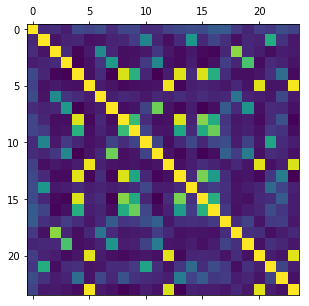

In [38]:
import matplotlib.pyplot as plt
import pandas
def plot_corr(df,size):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    #plt.xticks(range(len(corr.columns)), corr.columns);
    plt.show()
    
plot_corr(pandas.DataFrame(dist),5)

/home/yustiks/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


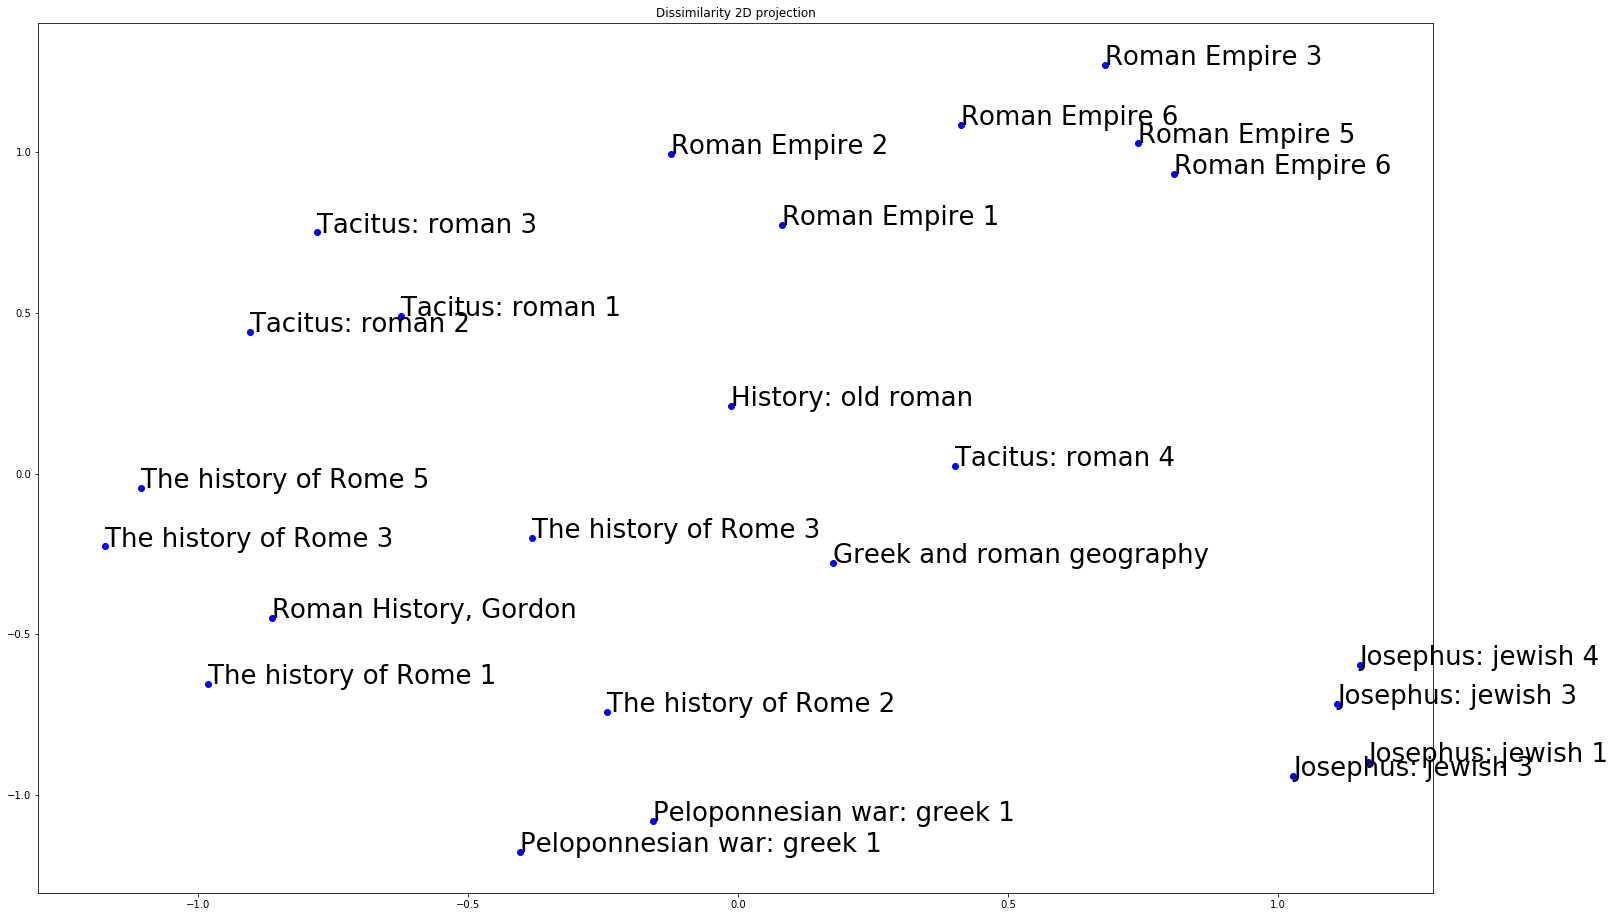

In [44]:
# Visualize Dissimilarity 2D projection


from sklearn.manifold import MDS


plt.figure(figsize=(25, 16))
plt.title('Dissimilarity 2D projection')

mds = MDS(n_components=2)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

for x, y, name in zip(xs, ys, names): 
    plt.scatter(x, y, c='blue')
    plt.text(x, y, name, fontsize=26)

plt.show()

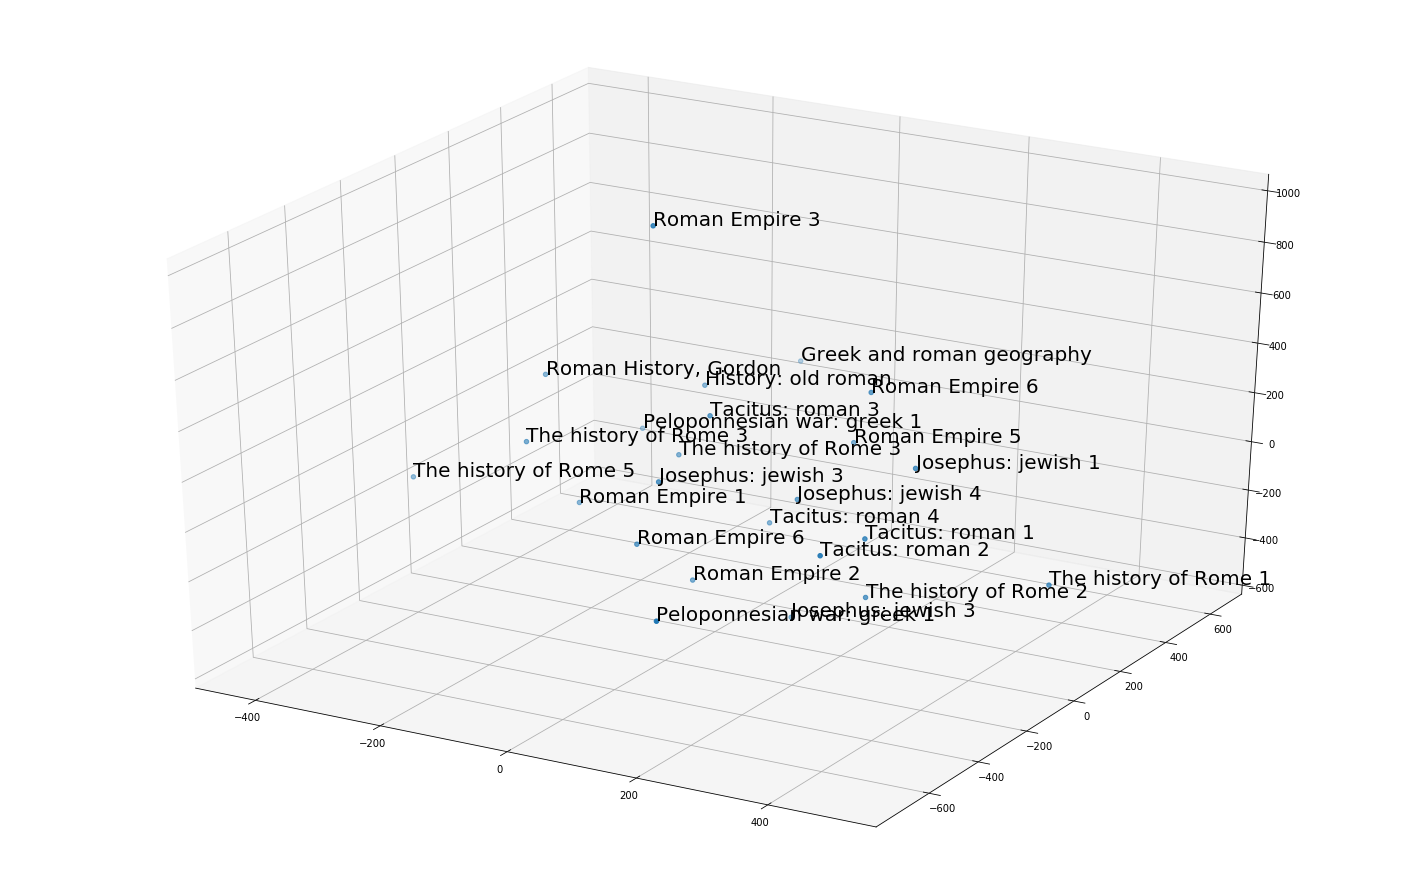

In [48]:
# Visualize Dissimilarity 3D projection
#from sklearn.manifold import MDS


from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
#mds = MDS(n_components=3)
mds = TSNE(n_components=3)

# X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
# X_embedded = TSNE(n_components=2).fit_transform(X)

pos = mds.fit_transform(dist)


fig = plt.figure(figsize=(25, 16))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])

#names = dataset.target_names

for x, y, z, filename in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, filename,fontsize=20)
    
plt.show()

In [84]:
print(names)

['gap_-C0BAAAAQAAJ', 'gap_2X5KAAAAYAAJ', 'gap_9ksIAAAAQAAJ', 'gap_Bdw_AAAAYAAJ', 'gap_CSEUAAAAYAAJ', 'gap_CnnUAAAAMAAJ', 'gap_DhULAAAAYAAJ', 'gap_DqQNAAAAYAAJ', 'gap_GIt0HMhqjRgC', 'gap_IlUMAQAAMAAJ', 'gap_MEoWAAAAYAAJ', 'gap_RqMNAAAAYAAJ', 'gap_TgpMAAAAYAAJ', 'gap_VPENAAAAQAAJ', 'gap_WORMAAAAYAAJ', 'gap_XmqHlMECi6kC', 'gap_aLcWAAAAQAAJ', 'gap_dIkBAAAAQAAJ', 'gap_fnAMAAAAYAAJ', 'gap_m_6B1DkImIoC', 'gap_ogsNAAAAIAAJ', 'gap_pX5KAAAAYAAJ', 'gap_udEIAAAAQAAJ', 'gap_y-AvAAAAYAAJ']


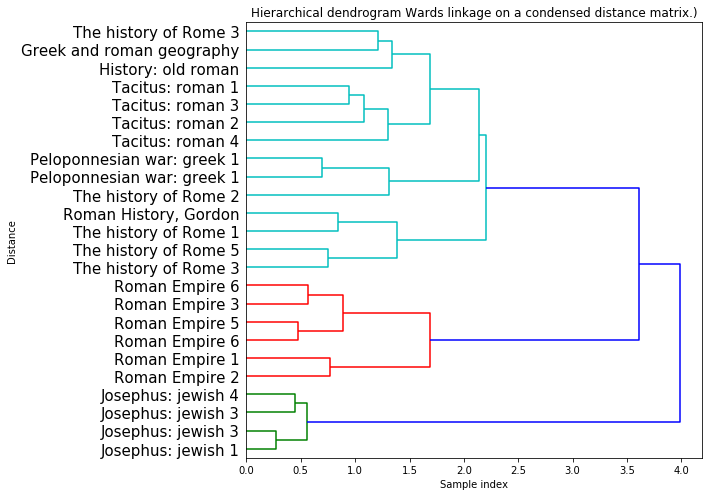

In [12]:

import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram


#method = 'single' 
#method_description = 'Single/Min/Nearest linkage on the condensed distance matrix'


#method = 'complete' 
#method_description = 'Complete/Max/Farthest point linkage on a condensed distance matrix.'


#method = 'average' 
#method_description = 'Average/UPGMA linkage on a condensed distance matrix.'


#method = 'weighted' 
#method_description = 'Weighted/WPGMA linkage on the condensed distance matrix.'


#method = 'centroid' 
#method_description = 'Centroid/UPGMC linkage.'


#method = 'median' 
#method_description = 'Median/WPGMC linkage.'

method = 'ward' 
method_description = 'Wards linkage on a condensed distance matrix.'

plt.figure(figsize=(10, 7))
plt.title('Hierarchical dendrogram ' + method_description + ')')

plt.xlabel('Sample index')
plt.ylabel('Distance')

linkage_matrix = linkage(dist, method)   


dendrogram(linkage_matrix, #ax = axes[1],
           labels = names,
           leaf_rotation=0.,  # rotates the x axis labels
           leaf_font_size=15.,  # font size for the x axis labels 
           orientation = 'right'
          )
           
plt.tight_layout()

plt.show()

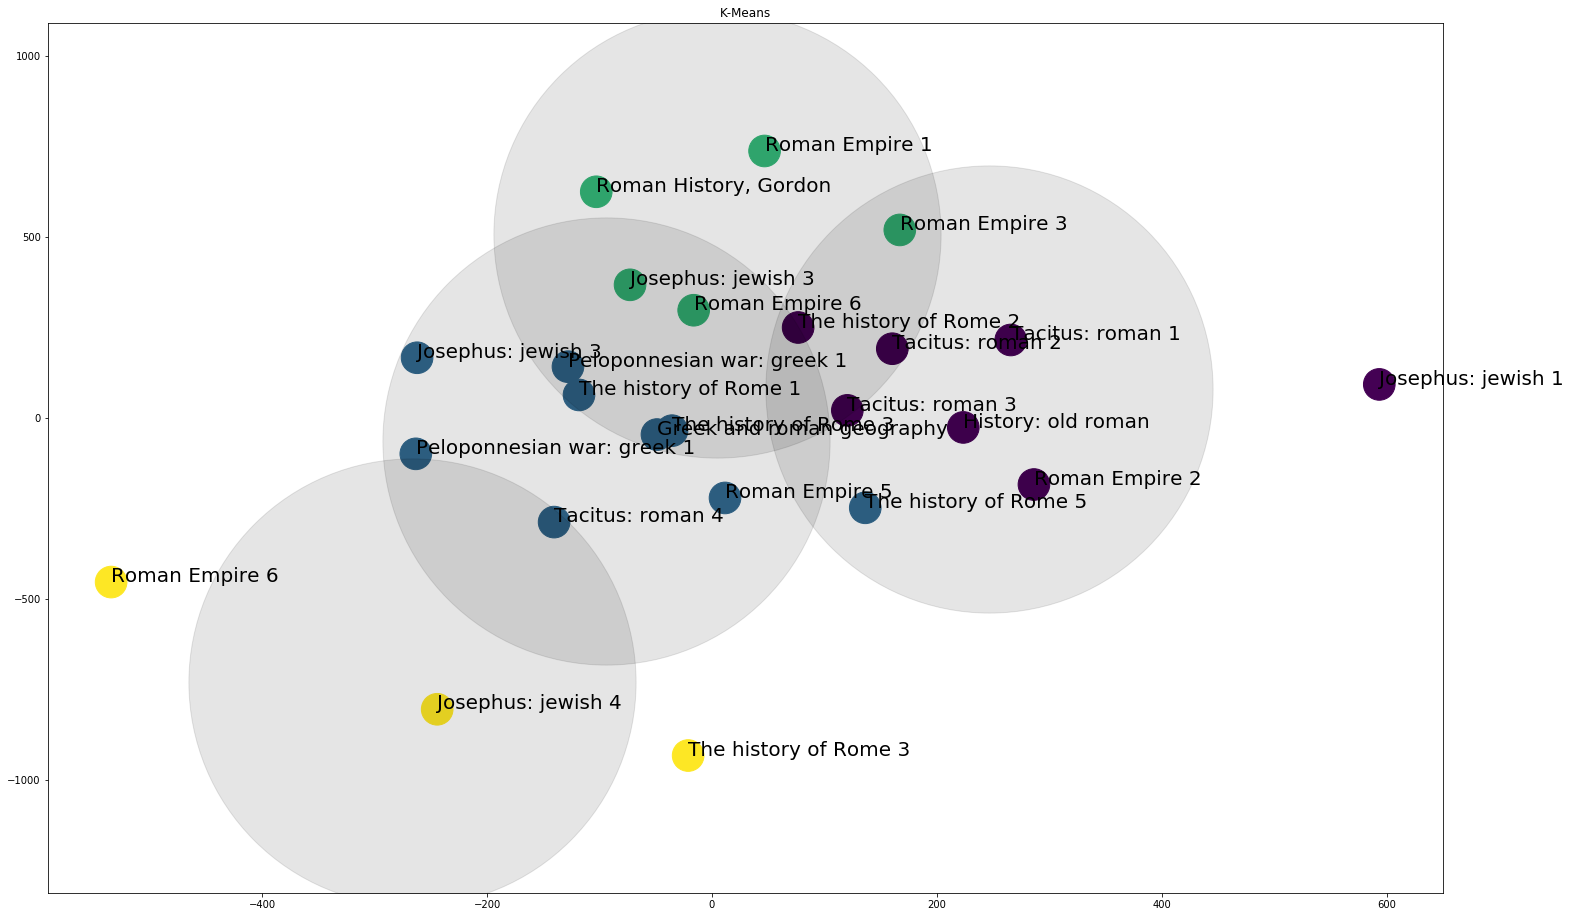

In [49]:
X = dist


from sklearn.manifold import MDS, TSNE

h = TSNE()


# Multidimetional Scaling 
# mds = MDS(n_components=2)
mds = TSNE(n_components=3)
X = mds.fit_transform(dist) # Закоментируй это и увидишь как результат выглядит в проекции на плоскость,
                            # то есть как выглядят реальные, не обработанные алгоритмом данные в проекции
    
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.figure(figsize=(25, 16))
plt.title('K-Means')

k = 4

kmeans = KMeans(k, random_state=0)

c = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=c, s=1000, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200000, alpha=0.1);

#Labels
for x, y, name in zip(X[:, 0], X[:, 1], dataset.target_names):   
    plt.text(x, y, d[name], fontsize=20)
    
plt.show()

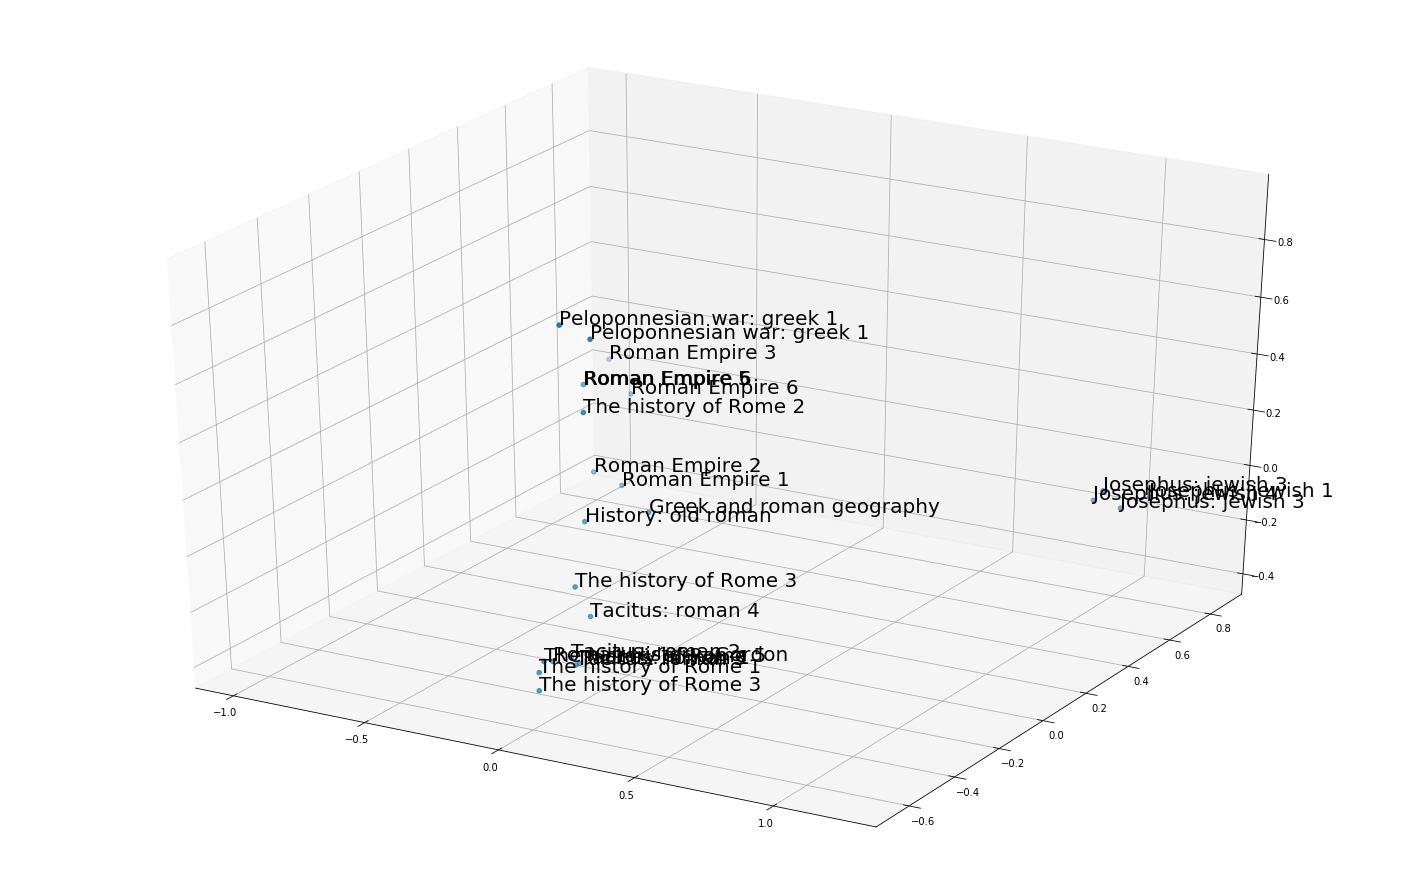

In [45]:
# Visualize Dissimilarity 3D projection
#from sklearn.manifold import MDS


from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(dist)
pos = pca.transform(dist)



fig = plt.figure(figsize=(25, 16))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])


for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s,fontsize=20)
    
plt.show()

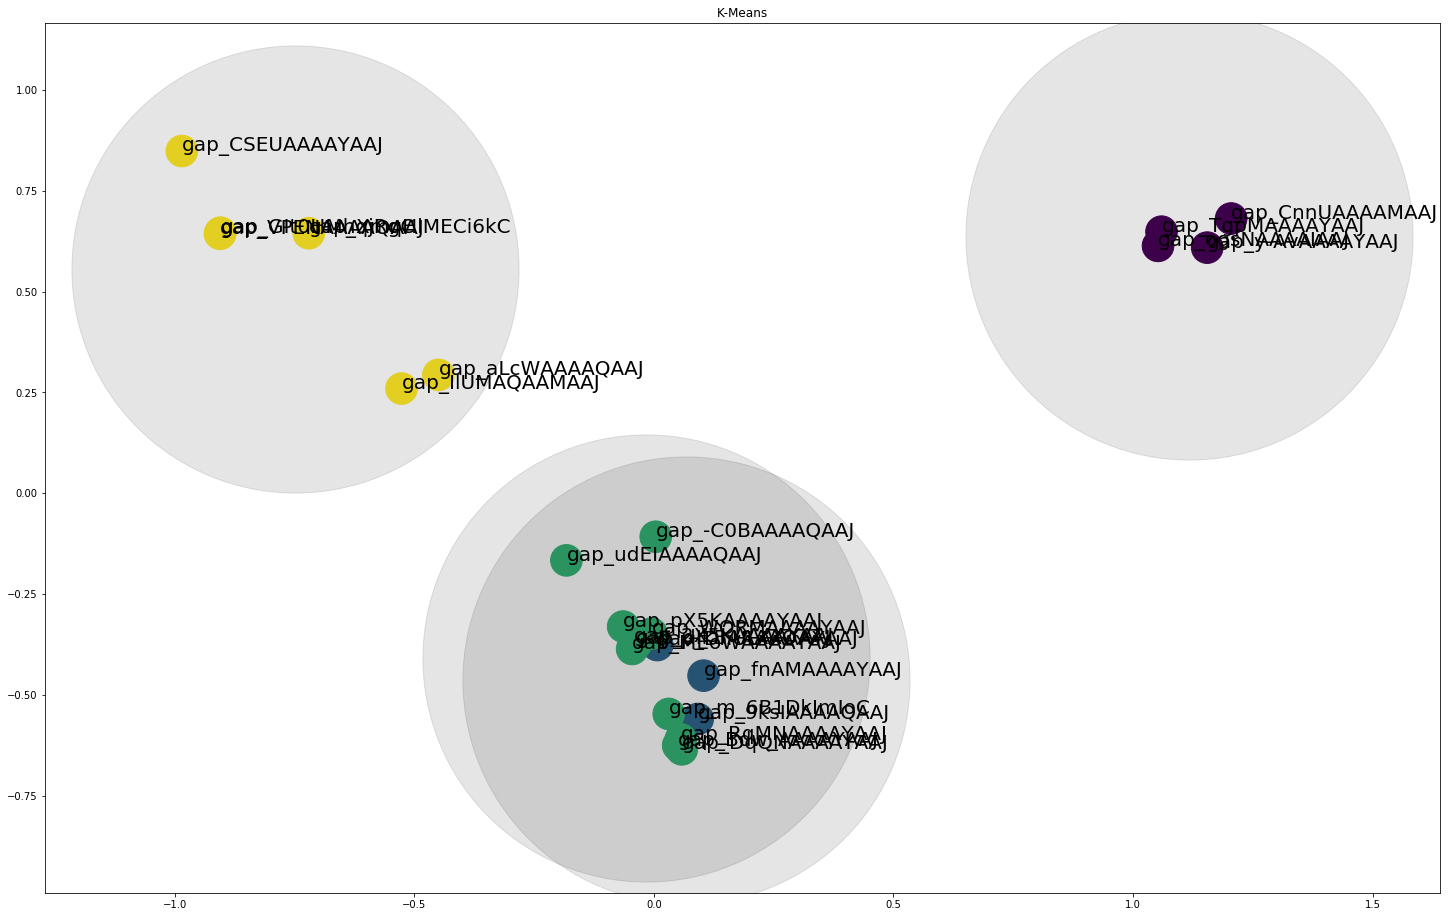

In [46]:
plt.figure(figsize=(25, 16))
plt.title('K-Means')

X = pos
k = 4
kmeans = KMeans(k, random_state=0)
c = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=c, s=1000, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200000, alpha=0.1);

#Labels
for x, y, name in zip(X[:, 0], X[:, 1], dataset.target_names):   
    plt.text(x, y, name, fontsize=20)
    
plt.show()

In [ ]:
linkage 